In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine

In [2]:
csv_file = 'eda.csv'
df = pd.read_csv('~/Documents/spiced-repos/eda-housingdata/data/eda.csv')
print(df.head()) 

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront   
0  7129300520       3.0       1.00       1180.0    5650.0     1.0         NaN  \
1  6414100192       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  5631500400       2.0       1.00        770.0   10000.0     1.0         0.0   
3  2487200875       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  1954400510       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated   
0   0.0          3      7  ...            0.0      1955           0.0  \
1   0.0          3      7  ...          400.0      1951       19910.0   
2   0.0          3      6  ...            0.0      1933           NaN   
3   0.0          5      7  ...          910.0      1965           0.0   
4   0.0          3      8  ...            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15        date     pr

In [3]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [4]:
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,4.0,2.50,3300.0,10250.0,1.0,0.0,0.0,3,7,...,910.0,1946,19910.0,98040,47.5873,-122.249,1950.0,6045.0,2014-09-08,905000.0
96,3422049190,3.0,1.75,1960.0,15681.0,1.0,0.0,0.0,3,7,...,0.0,1967,0.0,98032,47.3576,-122.277,1750.0,15616.0,2015-03-30,247500.0
97,1099611230,4.0,1.50,1160.0,6400.0,1.0,0.0,0.0,4,7,...,0.0,1975,0.0,98023,47.3036,-122.378,1160.0,6400.0,2014-09-12,199000.0
98,722079104,3.0,1.75,1810.0,41800.0,1.0,0.0,0.0,5,7,...,600.0,1980,0.0,98038,47.4109,-121.958,1650.0,135036.0,2014-07-11,314000.0


In [5]:
# Data Cleaning Steps ahead

In [6]:
#dropping all the duplicates
df = df.drop_duplicates()
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


In [52]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [7]:
#changing date to integer 
#df['date'] = df['date'].str.replace('-', '', regex=False) 
#df['date'] = df['date'].astype(int)

#df.info()
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [9]:
df.head(20)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


In [10]:
import haversine

print(tuple(haversine.Unit))

(<Unit.KILOMETERS: 'km'>, <Unit.METERS: 'm'>, <Unit.MILES: 'mi'>, <Unit.NAUTICAL_MILES: 'nmi'>, <Unit.FEET: 'ft'>, <Unit.INCHES: 'in'>, <Unit.RADIANS: 'rad'>, <Unit.DEGREES: 'deg'>)


In [11]:
# Calculate distance from Seattle city centre 
from haversine import haversine, Unit
seattle_centre = (47.621014, -122.333289)
df['lat_long'] = df.apply(lambda row: (row['lat'], row['long']), axis=1)
df['distance_centre'] = df.apply(lambda row: haversine(seattle_centre, row['lat_long'], unit=Unit.MILES), axis=1)

In [12]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,lat_long,distance_centre
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,"(47.5112, -122.257)",8.379640
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,"(47.721, -122.319)",6.940290
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,"(47.7379, -122.233)",9.326740
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,"(47.5208, -122.393)",7.462658
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,"(47.6168, -122.045)",13.429638


<Axes: xlabel='distance_centre', ylabel='Count'>

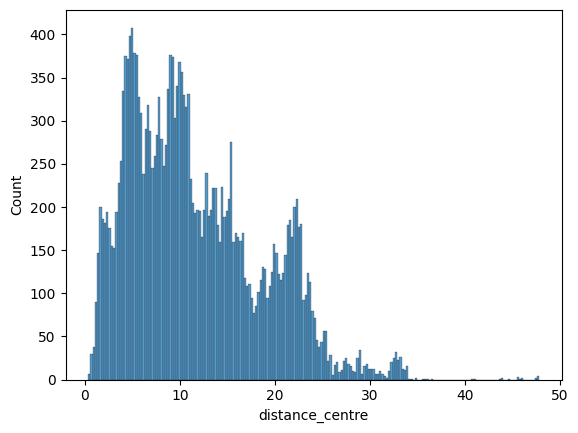

In [13]:
sns.histplot(df['distance_centre'], bins=200)

<Axes: xlabel='distance_centre', ylabel='price'>

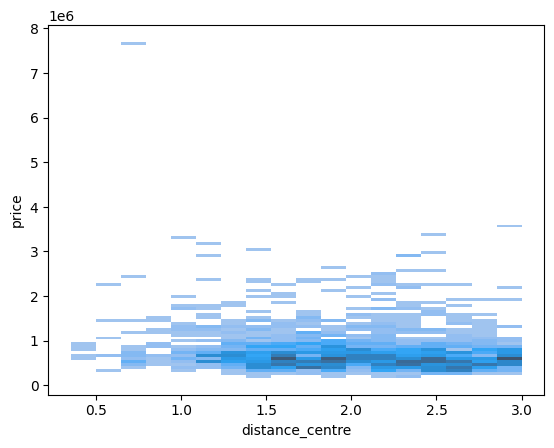

In [14]:
filtered_df = df.query("0 <= distance_centre <= 3")
#print(filtered_df)
sns.histplot(x='distance_centre', y='price', data=filtered_df)



In [15]:
#making the new column for renovated

# Kürzen der Werte auf die ersten 4 Ziffern
#df['real_renovated'] = df['yr_renovated'].apply(lambda x: int(str(int(x))[:4]))

#print(df.head())
df = df.fillna(0)
df['real_renovated'] = df['yr_renovated'].floordiv(10).astype(int)

df['real_renovated'] = df['yr_renovated'].floordiv(10).astype(int)



(1900.0, 2025.0)

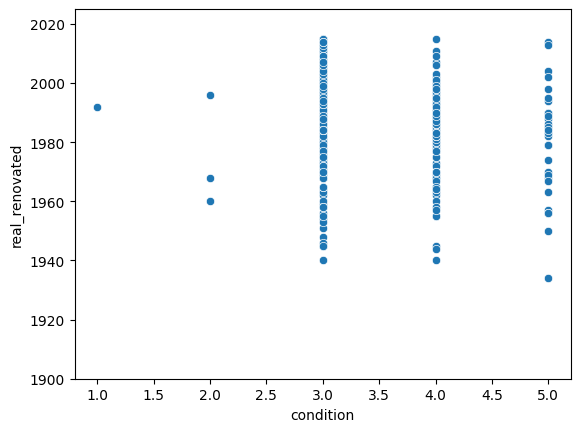

In [16]:
df_filtered = df [df['real_renovated'] > 0]


sns.scatterplot(x='condition', y='real_renovated', data=df_filtered)

plt.ylim(1900, 2025)


(1900.0, 2025.0)

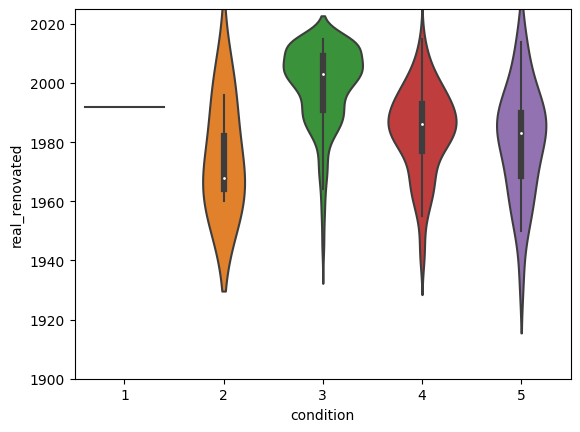

In [17]:
df_filtered = df [df['real_renovated'] > 0]


sns.violinplot(x='condition', y='real_renovated', data=df_filtered)

plt.ylim(1900, 2025)

In [18]:
#filtering out all the nulls
df_filtered = df [df['real_renovated'] > 0]

# Aggregating the mean 'real_renovated' for each 'condition'
agg_data = df_filtered.groupby('condition')['real_renovated'].mean().reset_index()

# Creating the barplot
sns.plot(x='condition', y='real_renovated', data=agg_data)
plt.ylim(1900, 2025)


AttributeError: module 'seaborn' has no attribute 'plot'

In [19]:
df_filtered = df [df['real_renovated'] > 0]
df['real_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: real_renovated, dtype: float64

(1850.0, 2025.0)

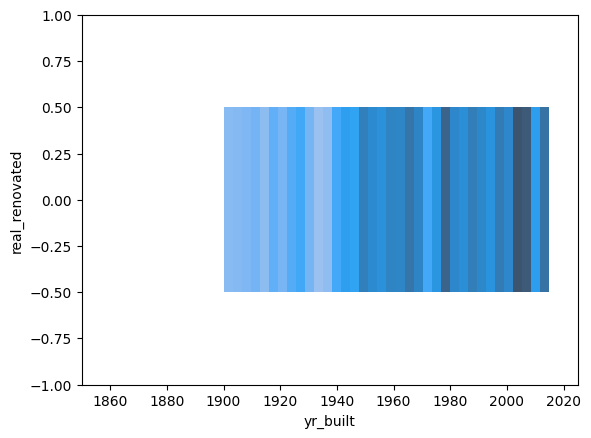

In [20]:
df_filtered = df [df['real_renovated'] == 0]


sns.histplot(x='yr_built', y='real_renovated', data=df_filtered)

plt.ylim(-1, 1)
plt.xlim(1850, 2025)

<Axes: xlabel='waterfront', ylabel='sqft_basement'>

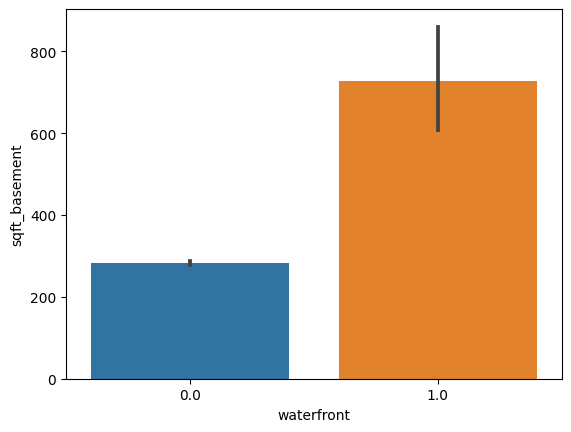

In [21]:
sns.barplot(x='waterfront', y='sqft_basement', data=df)


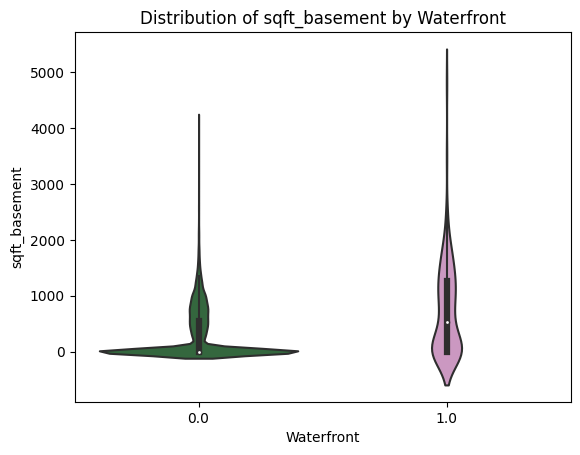

In [22]:
sns.violinplot(x='waterfront', y='sqft_basement', data=df, palette= 'cubehelix')
plt.title('Distribution of sqft_basement by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('sqft_basement')
plt.show()

In [23]:
df.groupby('waterfront')['sqft_basement'].describe()


,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0.0,21451.0,282.735817,434.747994,0.0,0.0,0.0,540.0,4130.0
1.0,146.0,728.458904,808.010866,0.0,0.0,535.0,1265.0,4820.0


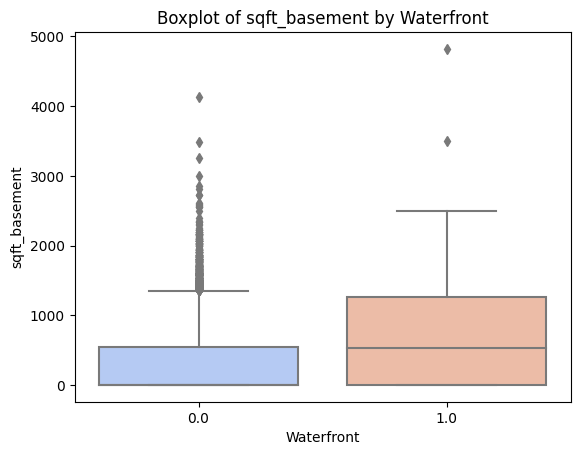

In [24]:
sns.boxplot(x='waterfront', y='sqft_basement', data=df, palette='coolwarm')
plt.title('Boxplot of sqft_basement by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('sqft_basement')
plt.show()

<Axes: title={'center': 'Distribution of sqft_basement by Waterfront'}, xlabel='waterfront', ylabel='sqft_basement'>

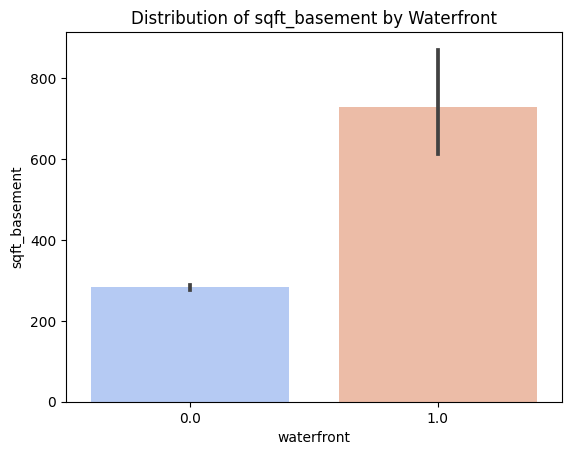

In [25]:
plt.title('Distribution of sqft_basement by Waterfront')

sns.barplot(x='waterfront', y='sqft_basement', data=df, palette='coolwarm')


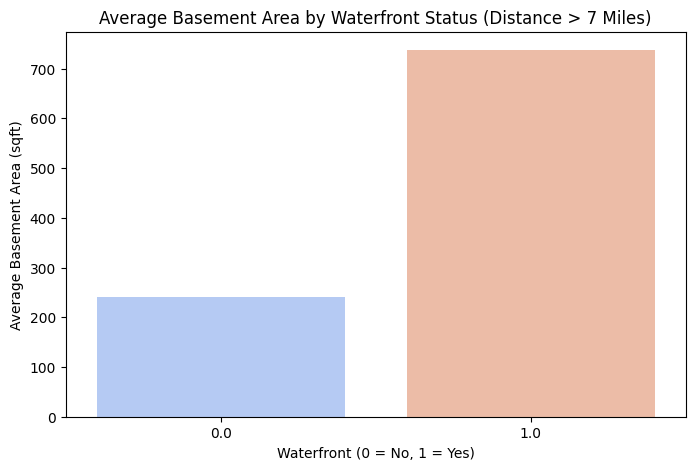

In [51]:
# 1. Filter: Entferne alle Zeilen, bei denen der Abstand zum Zentrum <= 7 Meilen ist
df_filtered = df[df['distance_centre'] > 7]

# 2. Gruppieren nach 'waterfront' und Berechnung der durchschnittlichen Kellerfläche
avg_basement_by_waterfront = df_filtered.groupby('waterfront')['sqft_basement'].mean()

# 3. Plot erstellen: Balkendiagramm für die durchschnittliche Kellerfläche mit/ohne Waterfront
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_basement_by_waterfront.index, y=avg_basement_by_waterfront.values, palette='coolwarm')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Average Basement Area by Waterfront Status (Distance > 7 Miles)')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Average Basement Area (sqft)')

# Plot anzeigen
plt.show()

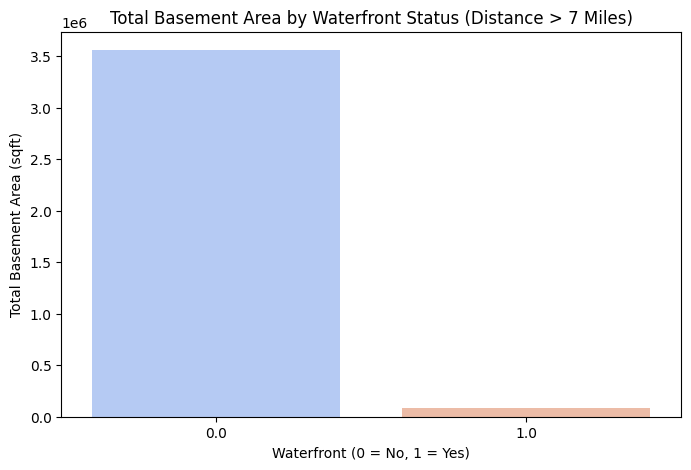

In [54]:
# 1. Filter: Entferne alle Zeilen, bei denen der Abstand zum Zentrum <= 7 Meilen ist
df_filtered = df[df['distance_centre'] > 7]

# 2. Gruppieren nach 'waterfront' und Berechnung der Gesamtfläche der Keller
basement_by_waterfront = df_filtered.groupby('waterfront')['sqft_basement'].sum()

# 3. Plot erstellen: Balkendiagramm für Kellerflächen mit/ohne Waterfront
plt.figure(figsize=(8, 5))
sns.barplot(x=basement_by_waterfront.index, y=basement_by_waterfront.values, palette='coolwarm')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Total Basement Area by Waterfront Status (Distance > 7 Miles)')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Total Basement Area (sqft)')

# Plot anzeigen
plt.show()

(-800.0, 6000.0)

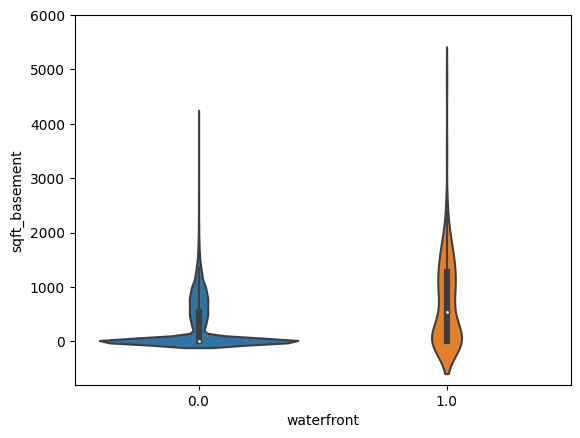

In [27]:
sns.violinplot(x='waterfront', y='sqft_basement', data=df)
plt.ylim(-800, 6000)


In [28]:
threshold_years = 0  # Houses renovated within the last 1 year are considered "Renovated"

df['no_renovation'] = df['real_renovated'].apply(lambda x: 'Non-Renovated' if x <= threshold_years else 'Renovated')


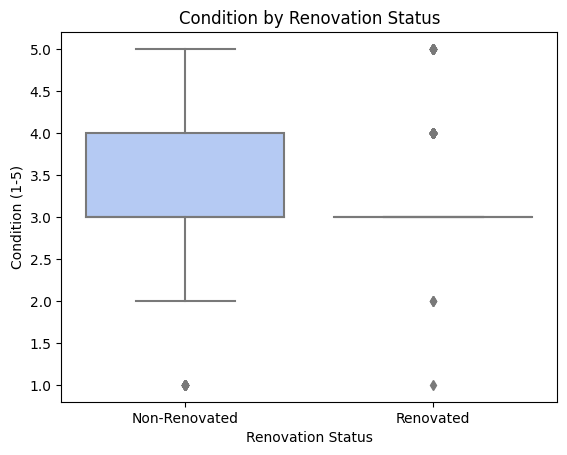

In [29]:
sns.boxplot(x='no_renovation', y='condition', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Condition by Renovation Status')
plt.xlabel('Renovation Status')
plt.ylabel('Condition (1-5)')

# Show the plot
plt.show()

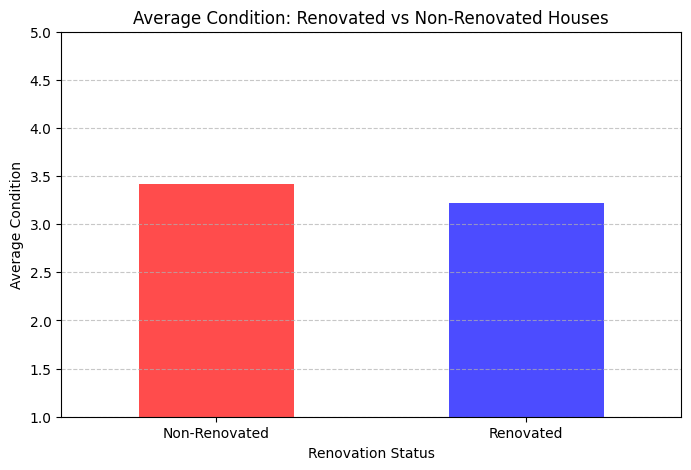

(1.0, 6.0)

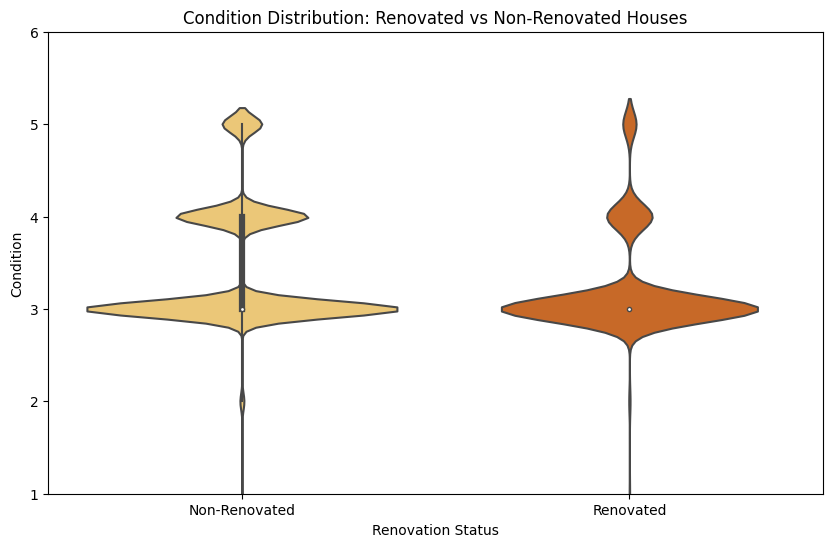

In [30]:
# Mittelwert der Bedingung für renoviert und nicht renoviert berechnen
condition_means = df.groupby('no_renovation')['condition'].mean()

# Plot: Vergleich der durchschnittlichen Bedingung
plt.figure(figsize=(8, 5))
condition_means.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Average Condition: Renovated vs Non-Renovated Houses')
plt.xlabel('Renovation Status')
plt.ylabel('Average Condition')
plt.xticks(rotation=0)
plt.ylim(1, 5)  # Wertebereich der Condition
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot anzeigen
plt.show()

# Optional: Boxplot zur Verteilung der Bedingungen
plt.figure(figsize=(10, 6))
sns.violinplot(x='no_renovation', y='condition', data=df, palette='YlOrBr')
plt.title('Condition Distribution: Renovated vs Non-Renovated Houses')
plt.xlabel('Renovation Status')
plt.ylabel('Condition')
plt.ylim(1, 6)  # Wertebereich der Condition

In [31]:
df.groupby('waterfront')['no_renovation'].describe()


,count,unique,top,freq
waterfront,,,,
0.0,21451,2,Non-Renovated,20736
1.0,146,2,Non-Renovated,117


(0.0, 50.0)

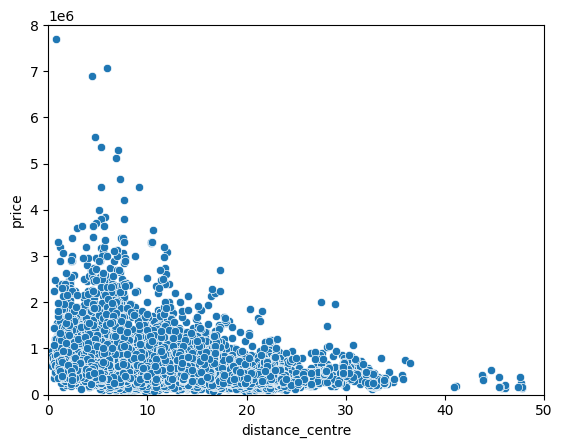

In [32]:
sns.scatterplot(x='distance_centre', y='price', data=df)
plt.ylim(0, 8000000)
plt.xlim(0, 50)

In [33]:
sns.lineplot(x='distance_centre', y='price_per_sqft', data=df)

ValueError: Could not interpret value `price_per_sqft` for parameter `y`

In [ ]:
# DEFINTION

df['price_per_sqft'] = df['price']/df['sqft_lot']

In [34]:
sns.histplot(x='distance_centre', y='price_per_sqft', data=df)

ValueError: Could not interpret value `price_per_sqft` for parameter `y`

In [48]:
sns.histplot(x='distance_centre', y='price_per_sqft', data=df)

plt.xlim(0, 5)
plt.ylim(0, 500)

ValueError: Could not interpret value `price_per_sqft` for parameter `y`

In [36]:
#making the new column for renovated

# Kürzen der Werte auf die ersten 4 Ziffern
#df['real_renovated'] = df['yr_renovated'].apply(lambda x: int(str(int(x))[:4]))

#print(df.head())
df = df.fillna(0)
df['real_renovated'] = df['yr_renovated'].floordiv(10).astype(int)

df['real_renovated'] = df['yr_renovated'].floordiv(10).astype(int)



In [37]:
df['date'] = pd.to_datetime(df['date'])

df['month_sold'] = df['date'].dt.strftime('%m').astype('Int32')


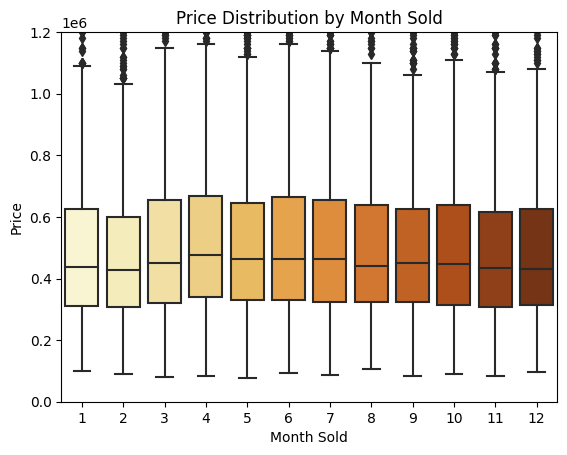

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.strftime('%m').astype('Int32')

# Assuming 'df' is your DataFrame with 'month_sold' and 'price' columns
sns.boxplot(x='month_sold', y='price', data=df, palette='YlOrBr')

# Add labels and title
plt.title('Price Distribution by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Price')
plt.ylim(0, 1200000)
# Show the plot
plt.show()

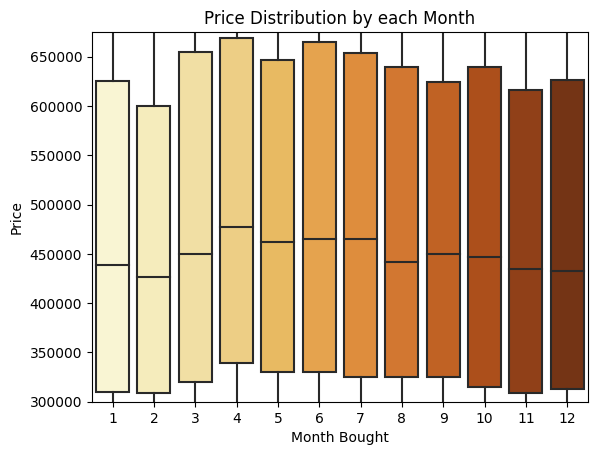

In [39]:
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.strftime('%m').astype('Int32')

# Assuming 'df' is your DataFrame with 'month_sold' and 'price' columns
sns.boxplot(x='month_sold', y='price', data=df, palette='YlOrBr')
#highlighted_months = ['month_sold' == 2]
#palette = ['yellow' if month in highlighted_months else 'gray' for month in df['month_sold']]
# Add labels and title
plt.title('Price Distribution by each Month')
plt.xlabel('Month Bought')
plt.ylabel('Price')
plt.ylim(300000, 675000)
# Show the plot
plt.show()

In [40]:
print(sorted(df['month_sold'].unique()))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [41]:
df['date'].describe

<bound method NDFrame.describe of 0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]>

In [42]:
median_price_per_sqft = df['price_per_sqft'].median()

# Create the histogram
sns.histplot(df['price_per_sqft'], kde=True)  # Adding kde for smooth density curve
plt.xlim(0, 600)
# Add a vertical line at the median
plt.axvline(median_price_per_sqft, color='red', linestyle='--', label=f'Median: {median_price_per_sqft}' )

# Optionally, add a label to indicate the median value
plt.text(median_price_per_sqft + 5, 1, f'Median: {median_price_per_sqft}', color='red', va='center')

# Display the plot
plt.legend()
plt.title('Price per Sqft from Centre')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

KeyError: 'price_per_sqft'

In [43]:
sns.histplot(x='distance_centre', y='price_per_sqft', data=df)#, color=sns.diverging_palette(145, 300, s=60, as_cmap=True))

# Add a title and axis labels
plt.title('Price per Sqft vs. Distance from Centre')
plt.xlabel('Distance from Centre')
plt.ylabel('Price per Sqft')

# Optionally, add the median line for price_per_sqft
median_price_per_sqft = df['price_per_sqft'].median()
plt.axhline(median_price_per_sqft, color='red', linestyle='--', label=f'Median Price/Sqft: {median_price_per_sqft:.2f}')
plt.legend()

# Display the plot
plt.show()

ValueError: Could not interpret value `price_per_sqft` for parameter `y`

In [44]:
sns.regplot(x='distance_centre', y='price_per_sqft', data=df, scatter_kws={'alpha':0.1}, line_kws={'color': 'orange'})
plt.title('Price per Sqft vs. Distance from Centre')



KeyError: 'price_per_sqft'

In [45]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,lat_long,distance_centre,real_renovated,no_renovation,month_sold
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,7,...,-122.257,1340.0,5650.0,2014-10-13,221900.0,"(47.5112, -122.257)",8.379640,0,Non-Renovated,10
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,-122.319,1690.0,7639.0,2014-12-09,538000.0,"(47.721, -122.319)",6.940290,1991,Renovated,12
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,-122.233,2720.0,8062.0,2015-02-25,180000.0,"(47.7379, -122.233)",9.326740,0,Non-Renovated,2
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,-122.393,1360.0,5000.0,2014-12-09,604000.0,"(47.5208, -122.393)",7.462658,0,Non-Renovated,12
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,-122.045,1800.0,7503.0,2015-02-18,510000.0,"(47.6168, -122.045)",13.429638,0,Non-Renovated,2


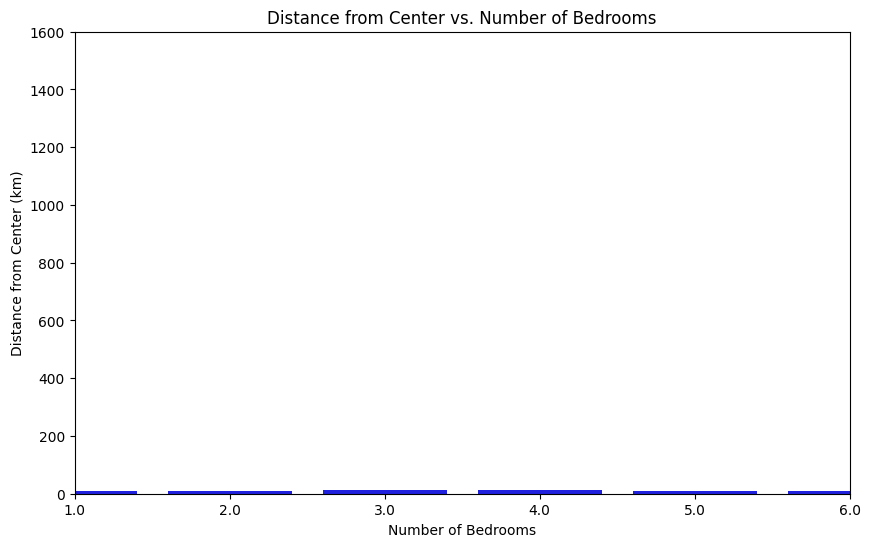

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='distance_centre', data=df, color='blue')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Distance from Center vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Distance from Center (km)')
plt.ylim(0, )
plt.xlim(0, 5)
# Plot anzeigen
plt.show()